In [24]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve

Code to generate ROC plot and PR plot

In [30]:
# Creating y_true data and y_predict probability confidence scores. These are rounded so score > 0.5 -> 1, score < 0.5 -> 0 as prediction.
y_true = np.array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,0, 1,0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])
y_predict = [0.89, 0.86, 0.9, 0.2, 0.1, 0.23, 0.78, 0.87, 0.99, 0.97, 0.4, 0.2, 0.32, 0.23, 0.76, 0.3, 0.2, 0.3, 0.2, 0.97, 0.98, 0.2, 0.78, 0.1, 0.78]

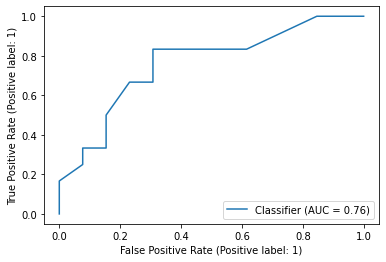

In [31]:
fpr, tpr, thresholds = roc_curve(y_true, y_predict)

RocCurveDisplay.from_predictions(y_true, y_predict)

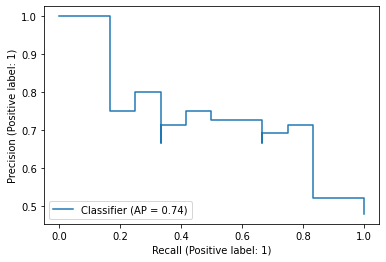

In [32]:
PrecisionRecallDisplay.from_predictions(y_true, y_predict)

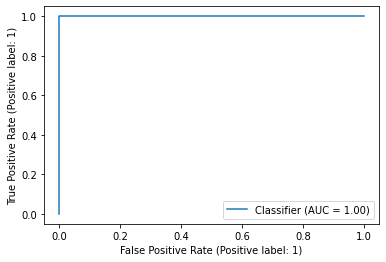

In [28]:
# Generating scores so that every prediction matches y_true when rounded
y_true = np.array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])
y_predict = [0.1, 0.86, 0.9, 0.2, 0.1, 0.23, 0.1, 0.87, 0.99, 0.1, 0.9, 0.2, 0.9, 0.23, 0.1, 0.3, 0.2, 0.1, 0.9, 0.97, 0.98, 0.9, 0.9, 0.1, 0.98]

fpr, tpr, thresholds = roc_curve(y_true, y_predict)
RocCurveDisplay.from_predictions(y_true, y_predict)

Creating the example to display model complexity

In [39]:
# Creating some x data and plotting a function 0.12x^3 - 0.2x^2
# the y training data to learn from has had random noise injected into it to provide something to overfit to for high model complexity.
x = np.linspace(-2, 2, 500)
y = 0.12*x**3 -0.2*x**2 + 0.25*np.random.normal(size=len(x))
y_clean = 0.12*x**3 -0.2*x**2

x_test = np.linspace(-2, 2, 50)

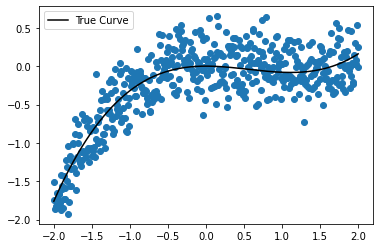

In [40]:
# Plotting the noisy data against the true function
plt.scatter(x, y)
plt.plot(x, y_clean, color='black', label='True Curve')
plt.legend()

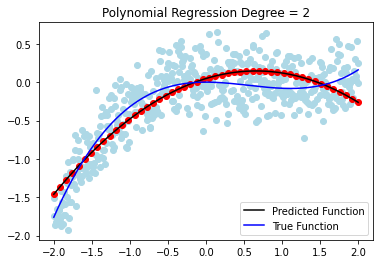

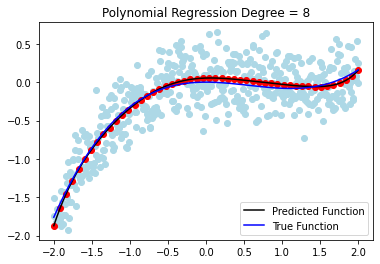

C:\Users\suman\AppData\Local\Temp/ipykernel_20076/1150030394.py:23: RankWarning: Polyfit may be poorly conditioned
  plot_poly_regression(x_test, 64)


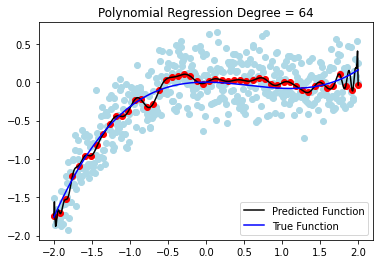

In [46]:
def plot_poly_regression(x_test, degree=2):
    # Fitting the polynomial regression model based on the degree (number of parameters)
    m = np.poly1d(np.polyfit(x, y, degree))
    y_test = m(x_test)
    y_line = m(x)
    
    # Plotting results
    plt.scatter(x, y, c='lightblue')
    plt.plot(x, y_line, c='black', label='Predicted Function')
    plt.plot(x, y_clean, c='blue', label='True Function')
    plt.scatter(x_test, y_test, c='red')
    plt.title(f"Polynomial Regression Degree = {degree}")
    plt.legend()
    plt.show()
    
# Underfitting
plot_poly_regression(x_test, 2)

# Good fit
plot_poly_regression(x_test, 8)

# Overfitting
plot_poly_regression(x_test, 64)